In [1]:
import matplotlib.pyplot as plt # graph functions and draw figures 
import numpy as np # linear algebra computations bbb
import sympy as sp # provides for symbolic computation (solving algebra problems) 
import seaborn as sbn # prettier matplotlib figures 
from scipy import * # scientific python
from sympy.plotting import plot, plot3d, plot3d_parametric_surface, PlotGrid

# Inlämningsuppgift
## IX1303 Algebra och Geometri, VT2021, period 4.
### Patrik Sjöfors

## 1.
Visa i $R^3$ lösningsmängden till $\begin{cases} z \ge \sqrt{x^2+y^2} \\ x^2+y^2+z^2 \le 1 \end{cases}$

vi löser ut $z$ och får $\begin{cases} z \ge \sqrt{x^2+y^2} \\ z \le \sqrt{1-x^2-y^2} \end{cases}$
eller $ \sqrt{x^2+y^2} \le \sqrt{1-x^2-y^2} $

  
och ritar ytorna. Lösningsmängden återfinns då mellan den konkava och den konvexa ytan:

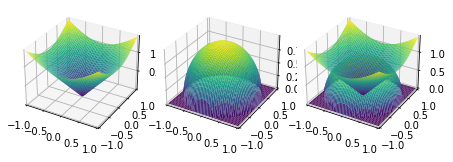

In [2]:
x, y, z = sp.symbols('x, y z')
z1 = sp.sqrt(x**2+y**2)   # lfs >= rhs 
z2 = sp.sqrt(1-x**2-y**2) # lfs <= rhs
p1 = plot3d(z1,(x,-1,1),(y,-1,1),size=(7,7),show=False)
p2 = plot3d(z2,(x,-1,1),(y,-1,1),size=(7,7), show=False)
p3 = plot3d(z1,z2,(x,-1,1),(y,-1,1),size=(7,7),show=False)
PlotGrid(1,3,p1,p2,p3)

Vi bekräftar och ritar även skärningspunkterna mellan de två ytorna i x-y-planet:

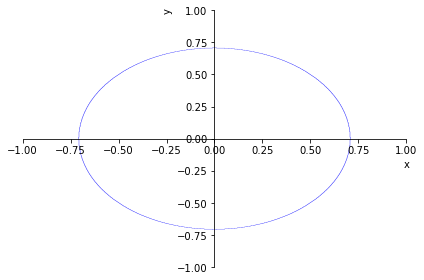

In [3]:
from sympy import plot_implicit
p = plot_implicit(sp.Eq(z1,z2),(x,-1,1),(y,-1,1))


***
## 2. 
Bestäm vinkeln mellan vektorerna 𝒂 = 2𝒊 − 2𝒋 − 2𝒌 och 𝒃 = 3𝒊 − 2𝒋 − 𝒌.
  
Vinkeln kan härledas ur formeln cos(α) = a · b / (|a| * |b|).  
Vi applicerar alltså inversen av cosinus på de normaliserade vektorernas skalärprodukt. Cosinus ligger inom [-1,1] som motsvarar ett varv i enhetscirkeln. Därför multiplicerar vi med 180 för att få ut vinkeln i grader.

In [4]:
a = np.array([2,-2,-2])
b = np.array([3,-2,-1])
# cos(α) = a · b / (|a| * |b|)
a_dot_b = np.dot(a, b)
a_norm = np.linalg.norm(b)
b_norm = np.linalg.norm(b)
alpha_radians = np.arccos( a_dot_b / (a_norm * b_norm))
alpha_degrees = alpha_radians * 180
print(alpha_degrees)

97.39791467228625


Svar: Vinkeln mellan vektorerna är ungefär lika med 97,4 grader.

***
# 4.
Givet vektorerna 𝒖 = 2𝒊 + 3𝒋 − 2𝒌, 𝒗 = 4𝒊 − 𝒋 − 𝒌 och 𝒘 = −4𝒊 − 𝒋 + 2𝒌, beräkna vektortrippelprodukten 𝒖 × (𝒗 × 𝒘).

In [5]:
u = np.array([2,3,-2])
v = np.array([4,-1,-1])
w = np.array([-4,-1,2])
# print(u,v,w)
print(np.cross(u, np.cross(v,w)))

[-32  22   1]


Svar: vektortrippelprodukten 𝒖 × (𝒗 × 𝒘) = -32𝒊 + 22𝒋 − 𝒌
***
## 7.
Givet matriserna A, B och C beräkna matriserna 𝐴 − 𝐵 + 𝐶, 𝐴𝐵𝐶 och 𝐶𝐵𝐴.

In [6]:
A = np.array([[3,2,4],[7,12,0],[2,5,2]])
B = np.array([[5,8,7], [6,4,9], [10,1,0]])
C = np.array([[5,22,5],[5,9,7],[6,8,2]])

In [7]:
print(A-B+C)

[[ 3 16  2]
 [ 6 17 -2]
 [-2 12  4]]


In [8]:
print(A*B*C)

[[ 75 352 140]
 [210 432   0]
 [120  40   0]]


In [9]:
print(C*B*A)

[[ 75 352 140]
 [210 432   0]
 [120  40   0]]


***
## 8.
Hitta den radreducerade trappstegsmatrisen (rref), har den någon redundans?

In [10]:
M = sp.Matrix([[2,4,8],[4,5,1],[7,9,3]])
M

Matrix([
[2, 4, 8],
[4, 5, 1],
[7, 9, 3]])

In [11]:
M.rref()[0]

Matrix([
[1, 0, -6],
[0, 1,  5],
[0, 0,  0]])

Eftersom den raddreducerade trappstegsmatrisen har en radvektor av bara nollor, som kan beskrivas som $ 0x + 0y = 0 \Leftrightarrow 0 = 0 $, har den i denna en redundans. Det innebär att raden inte är nödvändig för att lösa det motsvarande ekvationssystemet.
***
## 9.
Hitta egenvärdena till matrisen.

In [12]:
M = sp.Matrix([[9,-4,-2,-4],[-56,32,-28,44],[-14,-14,6,-14],[42,-33,21,-45]])
M

Matrix([
[  9,  -4,  -2,  -4],
[-56,  32, -28,  44],
[-14, -14,   6, -14],
[ 42, -33,  21, -45]])

In [13]:
M.eigenvals()

{13: 2, -12: 2}

Egenvärden till matris M är $-12 $ och $ 13$.
***
## 10.

Visa att kolumnerna i matris A är ortogonala.

Kolumnerna är ortogonala om de för varje distinkt par har en skalärprodukt lika med noll. Alltså kan vi beräkna skalärprodukten $B$ av $A$ och dess transponat $ A^T$. Varje position $i,j$ i $B$ motsvarar skalärprodukten av kolumnerna $i$ och $j$ i $A$. Är alla positioner utom i diagonalen $0$ så är kolumnerna i matrisen ortogonala.     


In [14]:
A = np.array([[-6,-3,6,1],[-1,2,1,-6],[3,6,3,-2],[6,-3,6,-1],[2,-1,2,3],[-3,6,3,2],[-2,-1,2,-3],[1,2,1,6]])
print(A)

[[-6 -3  6  1]
 [-1  2  1 -6]
 [ 3  6  3 -2]
 [ 6 -3  6 -1]
 [ 2 -1  2  3]
 [-3  6  3  2]
 [-2 -1  2 -3]
 [ 1  2  1  6]]


In [15]:
A_t = np.transpose(A)
print(A_t)

[[-6 -1  3  6  2 -3 -2  1]
 [-3  2  6 -3 -1  6 -1  2]
 [ 6  1  3  6  2  3  2  1]
 [ 1 -6 -2 -1  3  2 -3  6]]


In [16]:
A_T = np.transpose(A)
print(np.dot(A_T,A))        

[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]


Alla element utom de i diagonalen är noll. Alltså är kolumnerna ortogonala.

Vi kan också rita den radreducerade trappstegsmatrisen och se att kolumnerna är linjärt oberoende av varandra och därmed ortogonala: 

In [17]:
sp.Matrix(A).rref()[0]

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

***
## 11.
Du har följande geometriska transform: $T(x)$. Visa vad den åstadkommer
genom att låta transformen verka på vektorn $x = (0, 1)$. Räkna ut och plotta resulterande
vektorer $𝑇^n(x)$ för $n = 0, 1, 2, … , 5$. 

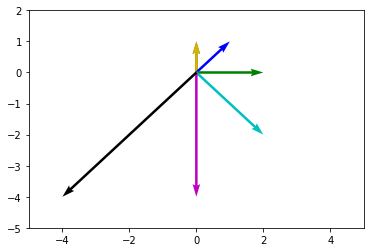

Matrix([
[0, 0, 1, 2,  2,  0, -4],
[1, 1, 1, 0, -2, -4, -4]])

In [18]:
Tx = np.array([[1,1],[-1,1]]) # transformation matrix
x = np.array([0,1])           # vector x
V = np.array([[0,1]])         # matrix to fill with resulting vectors

for n in range(0,6):
    Tx_n = np.linalg.matrix_power(Tx,n) # T^n
    x_n = np.dot(Tx_n,x)                # T^n(x)
    V = np.append(V,[x_n],axis=0)       # store vector

result_vectors = sp.Matrix(np.transpose(V)) # for pretty printing

origin = np.zeros((2,7)) # origin point for each vector = (0,0)
plt.figure()
ax = plt.gca()
ax.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', color=['r','y','b','g','c','m','k'], scale=1)
ax.set_xlim(-5,5)
ax.set_ylim(-5,2)
# ax.legend(['n=1','n=2','n=3','n=4','n=5'])
plt.draw()
plt.show()
result_vectors

Matrisen ovan visar, i kolumnerna, de transformerade vektorer för $n = 0$ till och med $5$. Vektor $T^0(x)$ är densamma som $T^1(x)$ och syns därför inte i figuren. Därefter kan vi medurs följa vad som händer med vektorn för de olika transformationerna.
***
## 12. 
Lös uppgift 21 i kursboken av Lay, kapitel 2.7, sid 163.

Vi ska lösa ut $C = (R,G,B)$ ur den givna ekvationen. Detta gör vi genom att multiplicera båda sidorna kring likhetstecknet med inversen av fosformatrisen, $F$: $FC = U <=> F^{-1}FC = F^{-1}U <=> C = F^{-1}U$, för $U = (X,Y,Z)$

In [19]:
F = np.array([[.61,.29,.150],[.35,.59,.063],[.04,.12,.787]])
F_inv = np.linalg.inv(F)
print(F)
print()
print(F_inv)

[[0.61  0.29  0.15 ]
 [0.35  0.59  0.063]
 [0.04  0.12  0.787]]

[[ 2.25855419 -1.03950752 -0.34726068]
 [-1.34953521  2.34409612  0.06957081]
 [ 0.09098101 -0.30458861  1.27768987]]


Vi får alltså ekvationen
$ \begin{bmatrix} R \\ G \\ B \end{bmatrix} =
\begin{bmatrix} 2.25855419 & -1.03950752 & -0.34726068 \\
    -1.34953521 & 2.34409612 & 0.06957081 \\
    0.09098101 & -0.30458861 &  1.27768987 \end{bmatrix}
 \begin{bmatrix} X \\ Y \\ Z \end{bmatrix}   
$
***

## 18.
18. Ange diagonalmatrisen $D$ och matriserna $P$ och $P^{-1}$ som används för diagonalisering av  

$ A = \begin{pmatrix} -6 & 4 & 0 & 9 \\ -3 & 0 & 1 & 6 \\ -1 & -2 & 1 & 0 \\ -4 & 4 & 0 & 7\end{pmatrix}
$

In [20]:
# Först hittar vi A:s egenvärden och motsvarande egenvektorer:

A = np.array([[-6,4,0,9],[-3,0,1,6],[-1,-2,1,0],[-4,4,0,7]])
(eigenvals, eigenvectors) =np.linalg.eig(A)
print(eigenvals)
print(eigenvectors)

[ 5.  1. -2. -2.]
[[-0.63245553  0.26261287  0.01695646 -0.73419677]
 [-0.31622777 -0.13130643  0.7799972  -0.41266892]
 [ 0.31622777 -0.91914503  0.52565029 -0.51984487]
 [-0.63245553  0.26261287 -0.33912922 -0.14290127]]


In [21]:
# Sedan bekräftar vi att vektorerna (kolumnerna) är linjärt oberoende
# och tillskriver dessa P:

sp.Matrix(eigenvectors).rref()[0]

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [22]:
P = eigenvectors

In [23]:
# D har egenvärdena längs diagonalen:

D = np.diag(eigenvals)
print(D)

[[ 5.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -2.  0.]
 [ 0.  0.  0. -2.]]


In [24]:
# Vi verifierar att AP = PD med numpy.isclose() då vi inte kan jämföra flyttal direkt:
AP = A @ P
PD = P @ D
np.isclose(AP,PD)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [25]:
# slutligen inversen av P:
P_inv = np.linalg.inv(P)
print(P_inv)

[[ 1.12938488e+00 -9.03507903e-01 -2.25876976e-01 -2.37170825e+00]
 [ 1.26929552e+00  2.08683456e-15 -1.26929552e+00 -1.90394328e+00]
 [-3.27568268e-01  1.34394907e+00 -4.47983023e-01 -5.68397778e-01]
 [-1.88846754e+00  8.09343233e-01 -2.69781078e-01  1.34890539e+00]]


#### Svar: 
 $ A = \begin{bmatrix}
  -6 & 4 & 0 & 9\\
  -3 & 0 & 1 & 6\\
  -1 & -2 & 1 & 0\\
  -4 & 4 & 0 & 7\\
\end{bmatrix} = PDP^{-1} = \\\\
\begin{bmatrix}
  -0.63245553 & 0.26261287 & 0.01695646 & -0.73419677\\
  -0.31622777 & -0.13130643 & 0.7799972 & -0.41266892\\
  0.31622777 & -0.91914503 & 0.52565029 & -0.51984487\\
  -0.63245553 & 0.26261287 & -0.33912922 & -0.14290127\\
\end{bmatrix}
\begin{bmatrix}
  5. & 0. & 0. & 0.\\
  0. & 1. & 0. & 0.\\
  0. & 0. & -2. & 0.\\
  0. & 0. & 0. & -2.\\
\end{bmatrix}\\
\begin{bmatrix}
  1.12938488e+00 & -9.03507903e-01 & -2.25876976e-01 & -2.37170825e+00\\
  1.26929552e+00 & 2.08683456e-15 & -1.26929552e+00 & -1.90394328e+00\\
  -3.27568268e-01 & 1.34394907e+00 & -4.47983023e-01 & -5.68397778e-01\\
  -1.88846754e+00 & 8.09343233e-01 & -2.69781078e-01 & 1.34890539e+00\\
\end{bmatrix}
$